In [4]:
!wget https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
import scipy.io
mat = scipy.io.loadmat('mnist.mat')

--2019-10-19 19:21:51--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2019-10-19 19:21:51--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14278089 (14M) [application/octet-stream]
Saving to: ‘mnist.mat.1’

mnist.mat.1         100%[===================>]  13.62M  10.0MB/s    in 1.4s    

2019-10-19 19:21:53 (10.0 MB/s) - ‘mnist.mat.1’ saved [14278089/14278089]



In [5]:
import numpy as np
import matplotlib.pyplot as plt

trainX = np.array(mat["trainX"], dtype=float)
testX = np.array(mat["testX"], dtype=float)

trainy = mat["trainY"]
testy = mat["testY"]
print(trainX.shape, testX.shape) 
print(trainy.shape, testy.shape)

(60000, 784) (10000, 784)
(1, 60000) (1, 10000)


0.242 121
0.346 173
0.332 166
0.456 228
0.542 271
0.63 315
0.652 326
0.696 348
0.744 372
0.77 385
0.798 399
0.818 409
0.826 413
0.826 413
0.838 419
0.848 424
0.832 416
0.838 419
0.846 423
0.846 423
0.85 425
0.856 428
0.86 430
0.864 432
0.86 430
0.852 426
0.85 425
0.858 429
0.864 432
0.86 430


Text(0, 0.5, 'Accuracy (in % correctly classified)')

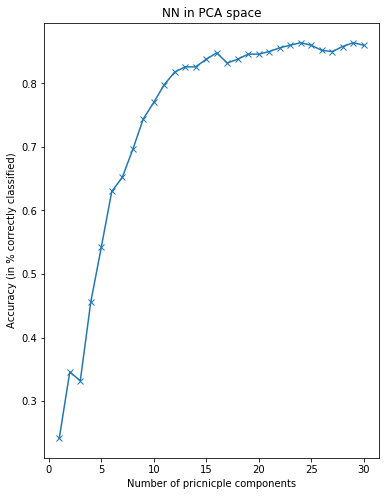

In [8]:
trn_size = 1000
tst_size = 500
trainX = trainX[:trn_size,:]
testX = testX[:tst_size,:]
xzero = trainX - np.mean(trainX, axis=0) 
test_zero = testX - np.mean(testX, axis=0)
y = trainy[:,:trn_size][0]

components = {}
[u, s, v] = np.linalg.svd(xzero)
PCs = v.T

for comps in range(1, 31):
  Xprojected = np.matmul(xzero, PCs[:, :comps])
  Tprojected = np.matmul(test_zero, PCs[:, :comps])
  components.update( {comps : NN(Xprojected, Tprojected)} )
  
plt.figure(figsize=(6,8))
plt.plot(components.keys(), components.values(), '-x')
plt.title('NN in PCA space')
plt.xlabel('Number of pricnicple components')
plt.ylabel('Accuracy (in % correctly classified)')

In [0]:
def euclidean_distance(x, y):
  return np.sqrt(np.sum(np.power(x-y, 2)))

def NN (Xprojected, Tprojected):
  ec = 0
  for tstx in range(tst_size):
    edistances = []
    for trnx in range(trn_size):
      edistances.append( euclidean_distance( Xprojected[trnx, :], Tprojected[tstx, :] ) )
      
    edistances = np.array(edistances)    
    
    if(y[np.argmin(edistances)] == testy[0][tstx]):
      ec += 1
  print(ec/tst_size, ec)
  return (ec/tst_size)

Text(0, 0.5, 'Accuracy (in % correctly classified)')

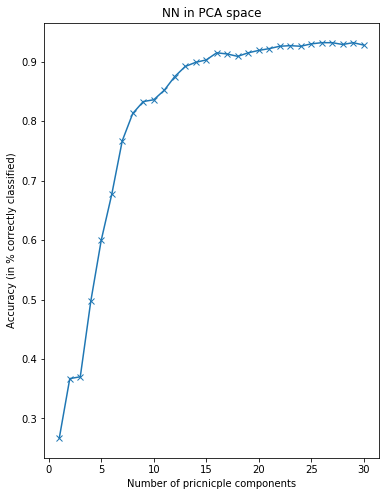